In [14]:
## Importing required packages
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

from langchain_huggingface import HuggingFaceEndpoint, ChatHuggingFace
from dotenv import load_dotenv

In [15]:
## Initiating the environment
load_dotenv()

## Defining and initiating llm
llm = HuggingFaceEndpoint(
    repo_id= 'meta-llama/Llama-3.2-1B-Instruct'
    )

model = ChatHuggingFace(llm = llm)

In [16]:
## Defining the state class
class LLMState(TypedDict):
    question: str
    answer: str

In [17]:
## Defining the function that executes at node and pass the state
def qna(state: LLMState) -> LLMState:

    ## Ask the question from state
    question = state['question']

    ## Form a prompt
    prompt = f'ANswer the following question: {question}'

    ## Ask a question to the LLM
    answer = model.invoke(prompt).content

    ## Update the answer in the state
    state['answer'] = answer

    return state

In [19]:
## Creting the graph
graph = StateGraph(LLMState)

## Add nodes
graph.add_node('qna', qna)

## Add edges
graph.add_edge(START, 'qna')
graph.add_edge('qna', END)

## Compile graph
workflow = graph.compile()

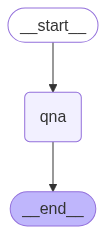

In [22]:
## visualize the graph
workflow

In [23]:
## Invoke graph
initial_state = {'question' : 'How far is moon from the earth ?'} 
final_state = workflow.invoke(initial_state)
print(final_state)

Our latest automated health check on model 'meta-llama/Llama-3.2-1B-Instruct' for provider 'novita' did not complete successfully.  Inference call might fail.


{'question': 'How far is moon from the earth ?', 'answer': "The average distance from the Earth to the Moon is approximately 384,400 kilometers (238,900 miles). This distance is constantly changing due to the elliptical shape of the Moon's orbit around the Earth. At its closest point, called perigee, the distance is about 356,400 kilometers (221,500 miles), and at its farthest point, called apogee, it's about 405,500 kilometers (252,000 miles)."}
